Unzipping zip file.

In [ ]:
!unzip "/content/irish.zip"

Archive:  /content/irish.zip
replace Iris.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


Importing the libraries and packages.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from keras.utils import to_categorical
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

Creating the Dataframe.

In [ ]:
df = pd.read_csv('/content/Iris.csv')

In [ ]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


Checking the presence of null values.

In [ ]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


As Species column is of object type which model can not deal with. So we have to change it. 

Id column is not usable. Lets drop the Id column.

In [ ]:
df.drop(["Id"],axis=1,inplace=True)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Correlation among different features.

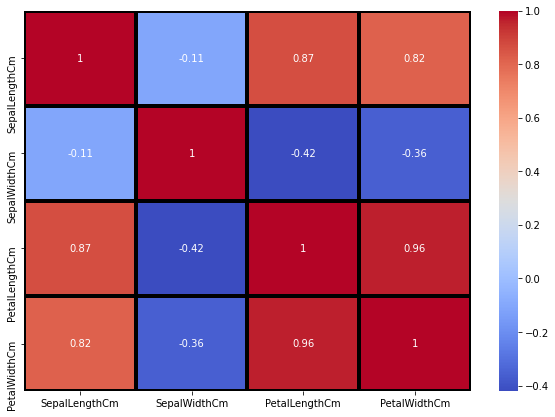

In [ ]:
corrMatrix = df.corr()
plt.figure(figsize=(10,7))
sns.heatmap(corrMatrix, annot=True,cmap= 'coolwarm', linewidths=3, linecolor='black')
plt.show()

There is no correlation between SepalLengthCm and SepalWidthCm.

SepalLengthCm is higly correlated with PetalWidthCm and PetalLengthCm.

PetalWidthCm is highly correlated with PetalLengthCm.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


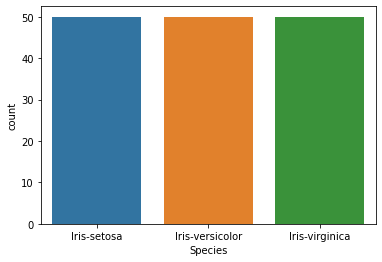

In [ ]:
sns.countplot(df.Species)

All of the species are equally distributed. 

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


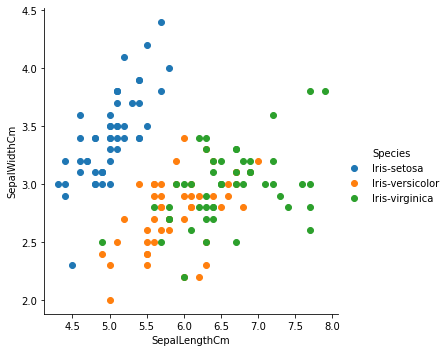

In [ ]:
sns.FacetGrid(df, hue="Species", size=5).map(plt.scatter, "SepalLengthCm", "SepalWidthCm").add_legend();

We can distinguish Setosa easily but versicolor and Virginica is not clear.

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


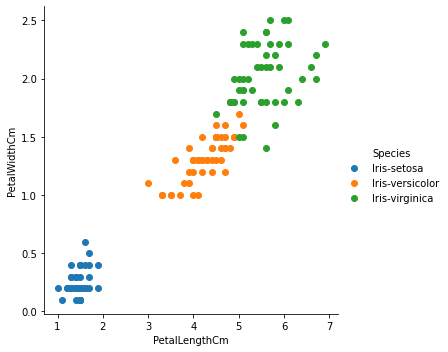

In [ ]:
sns.FacetGrid(df, hue="Species", size=5).map(plt.scatter, "PetalLengthCm", "PetalWidthCm").add_legend();

It seems like Petal is better than Sepal to distinguish Species.

Other scatterplots between species and different features.

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


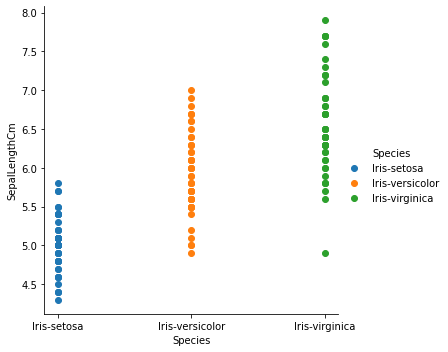

In [ ]:
sns.FacetGrid(df, hue="Species", size=5).map(plt.scatter, "Species", "SepalLengthCm").add_legend();

Checked the 

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


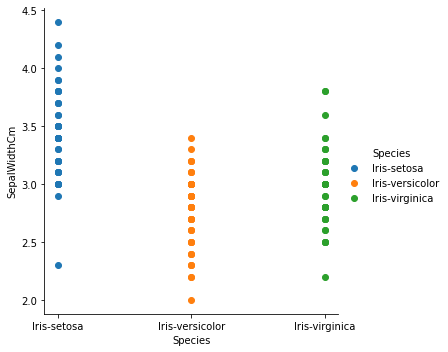

In [ ]:
sns.FacetGrid(df, hue="Species", size=5).map(plt.scatter, "Species", "SepalWidthCm").add_legend();

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


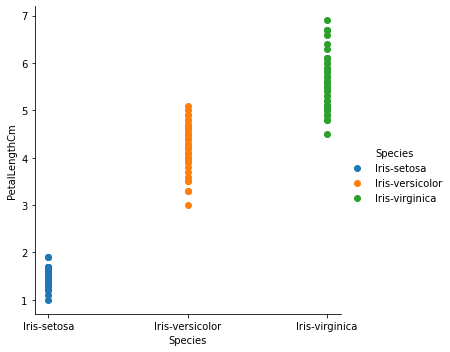

In [ ]:
sns.FacetGrid(df, hue="Species", size=5).map(plt.scatter, "Species", "PetalLengthCm").add_legend();

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


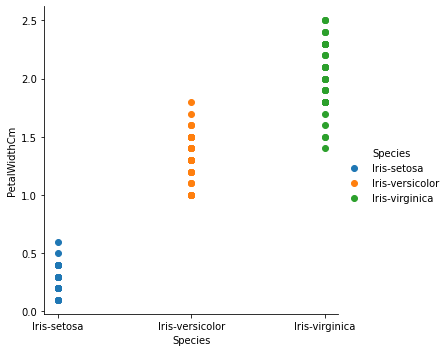

In [ ]:
sns.FacetGrid(df, hue="Species", size=5).map(plt.scatter, "Species", "PetalWidthCm").add_legend();

Violin Plots.

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr

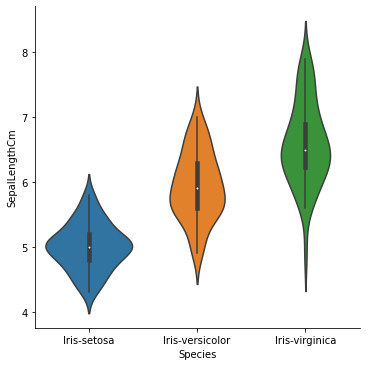

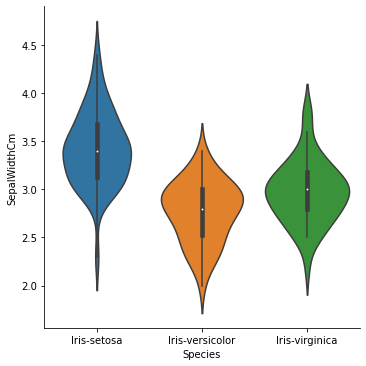

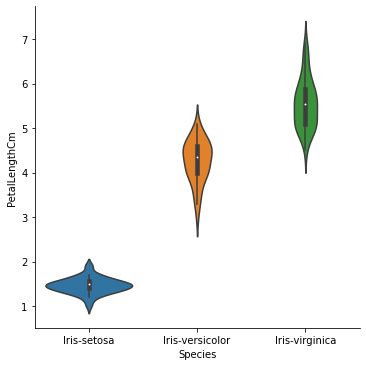

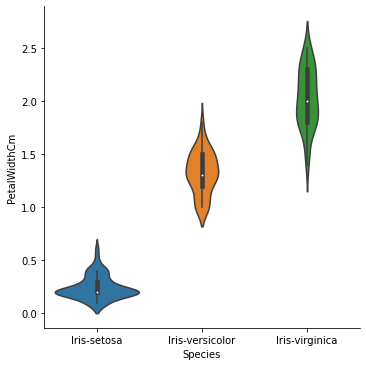

In [ ]:
violincols=["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]
for i in violincols:
    sns.factorplot(x="Species",y=i,data=df,kind="violin");

Label encoding is being done on Species as this column values are object type which the model can not deal.

In [ ]:
species_encoder=LabelEncoder()
df['Species']= species_encoder.fit_transform(df['Species'])

Spliting the dataset

In [ ]:
y=df.Species
X=df.drop(["Species"],axis=1)

# normalization
X=(X-np.min(X))/(np.max(X)-np.min(X))

In [ ]:
Y = to_categorical(y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=10)

In [ ]:
X_train.shape

(120, 4)

In [ ]:
import tensorflow
from tensorflow.keras.optimizers import Adam

Creating NN Model.

In [ ]:
model = Sequential()
model.add(Dense(5, activation='relu', input_shape = (4,)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(4, activation='relu'))
model.add(BatchNormalization())

model.add(Dense(3, activation='softmax'))

model.compile(optimizer= 'Adam', loss = 'categorical_crossentropy',metrics = ['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 5)                 25        
_________________________________________________________________
batch_normalization_4 (Batch (None, 5)                 20        
_________________________________________________________________
dropout_2 (Dropout)          (None, 5)                 0         
_________________________________________________________________
dense_7 (Dense)              (None, 4)                 24        
_________________________________________________________________
batch_normalization_5 (Batch (None, 4)                 16        
_________________________________________________________________
dense_8 (Dense)              (None, 3)                 15        
Total params: 100
Trainable params: 82
Non-trainable params: 18
________________________________________________________

In [ ]:
history = model.fit(X_train, y_train,batch_size=4, steps_per_epoch=len(X_train) // 4, epochs=80,
                    validation_data=(X_test, y_test),
                    validation_steps=len(X_test) //4)


Epoch 1/80
30/30 [==============================] - 1s 12ms/step - loss: 1.2122 - accuracy: 0.3925 - val_loss: 1.1113 - val_accuracy: 0.2143
Epoch 2/80
30/30 [==============================] - 0s 5ms/step - loss: 1.0916 - accuracy: 0.4169 - val_loss: 1.1138 - val_accuracy: 0.3929
Epoch 3/80
30/30 [==============================] - 0s 5ms/step - loss: 0.9394 - accuracy: 0.5588 - val_loss: 1.1101 - val_accuracy: 0.5714
Epoch 4/80
30/30 [==============================] - 0s 5ms/step - loss: 1.0517 - accuracy: 0.3909 - val_loss: 1.0953 - val_accuracy: 0.5714
Epoch 5/80
30/30 [==============================] - 0s 5ms/step - loss: 0.9638 - accuracy: 0.4929 - val_loss: 1.0738 - val_accuracy: 0.5714
Epoch 6/80
30/30 [==============================] - 0s 5ms/step - loss: 0.8900 - accuracy: 0.6035 - val_loss: 1.0354 - val_accuracy: 0.5714
Epoch 7/80
30/30 [==============================] - 0s 5ms/step - loss: 0.8680 - accuracy: 0.6057 - val_loss: 0.9946 - val_accuracy: 0.5714
Epoch 8/80
30/30 [=

Validation accuracy of the NN model is 92%

Now using the data in a Random Forest clssifier model.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfs= RandomForestClassifier().fit(X_train,y_train)
print("Random Forest Train accuracy :",rfs.score(X_train,y_train))
print("Random Forest Test accuracy :",rfs.score(X_test,y_test))

Random Forest Train accuracy : 1.0
Random Forest Test accuracy : 0.9666666666666667


RF clssifier is providing 96% accuracy. 